In [3]:
from musical.theory.note import Note
from musical.audio.playback import play
from musical.audio import source

import matplotlib.pyplot as plt
import plotly.express as px

from collections import defaultdict

pygame 2.0.1 (SDL 2.0.14, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
g3 = Note('G3')

In [26]:
# Timeline - this code was directly copied from the examples area.
# TODO: needs a much more user-friendly and automatic means of generating sound

# XXX: Early implementation of timeline/hit concepts. Needs lots of work

# TODO: Associate sound source with Hit instances somehow
# TODO: Amplitude, possibly other dynamics attributes


class Hit:

    ''' Rough draft of Hit class. Stores information about the hit and generates
            the audio array accordingly. Currently implements a basic cache to avoid
            having to rerender identical hits
    '''

    cache = {}

    def __init__(self, note, length):
        self.note = note
        self.length = length

    def render(self):
        # Render hit of "key" for "length" amound of seconds
        # XXX: Currently only uses a string pluck
        key = (str(self.note), self.length)
        if key not in Hit.cache:
            Hit.cache[key] = source.pluck(self.note, self.length)
        return Hit.cache[key]

# TODO: changing sampling, decay breaks everything.
class HitDev:

    ''' Rough draft of Hit class. Stores information about the hit and generates
            the audio array accordingly. Currently implements a basic cache to avoid
            having to rerender identical hits
    '''

    cache = {}

    def __init__(self, note, length):
        self.note = note
        self.length = length

    def render(self, rate=44100, decay=1.0):
        # Render hit of "key" for "length" amound of seconds
        # XXX: Currently only uses a string pluck
        print(rate)
        key = (str(self.note), self.length)
        if key not in HitDev.cache:
            HitDev.cache[key] = source.pluck(freq=self.note, length=self.length, decay=decay, rate=rate)
        return HitDev.cache[key]



class Timeline:

    ''' Rough draft of Timeline class. Handles the timing and mixing of Hits
    '''

    def __init__(self, rate=44100):
        self.rate = rate
        self.hits = defaultdict(list)

    def add(self, time, hit):
        # Add "hit" at "time" seconds in
        self.hits[time].append(hit)

    def calculate_length(self):
        # Determine length of playback from end of last hit
        length = 0.0
        for time, hits in self.hits.items():
            for hit in hits:
                length = max(length, time + hit.length)
        return length

    def render(self):
        # Return timeline as audio array by rendering the hits
        out = source.silence(self.calculate_length())
        for time, hits in self.hits.items():
            index = int(time * self.rate)
            for hit in hits:
                data = hit.render()
                out[index:index + len(data)] += data
        return out


In [27]:
hit_reg = Hit(g3, 1)
hit_dev = HitDev(g3, 1)

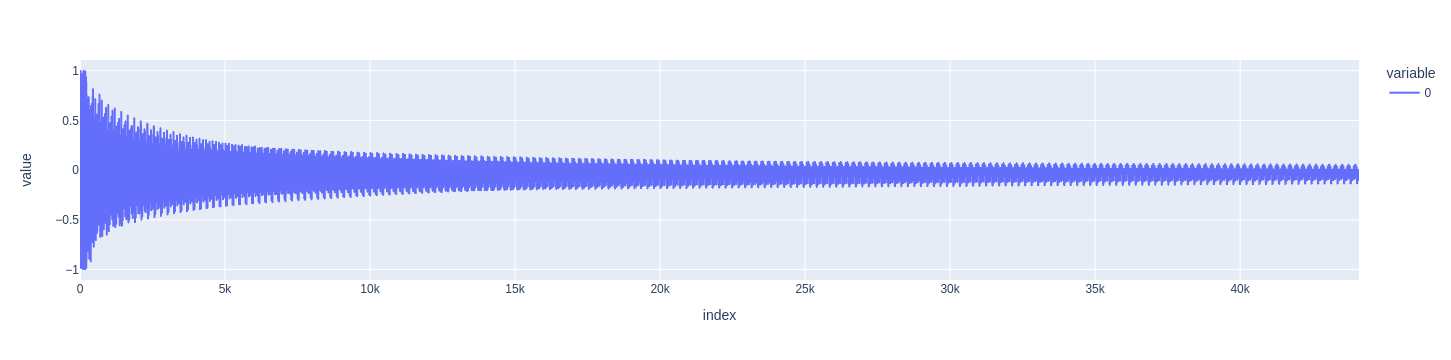

In [28]:
# This is the actual wave-form of the sound. It is exactly one second of audio.
px.line(hit_reg.render())

100


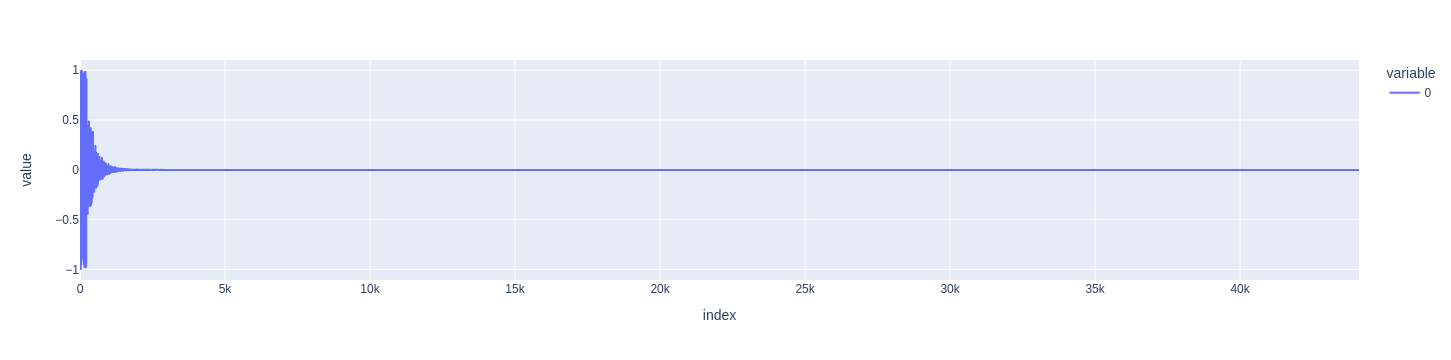

In [36]:
px.line(hit_dev.render(rate=100, decay=0.5))

In [38]:
play(hit_dev.render(rate=10000, decay=0.998))

10000


In [39]:
play(hit_reg.render())